In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
train_df = pd.read_csv('../input/simlarities_by_pdu.csv')
train_df.tail()

,p_sim,d_sim,u_sim,sim
513745,0.074833,1.0,1.0,0.370130
513746,0.050641,1.0,1.0,0.043367
513747,0.137972,1.0,1.0,0.495652
513748,0.073358,1.0,1.0,0.043724
513749,0.135429,1.0,1.0,0.028007


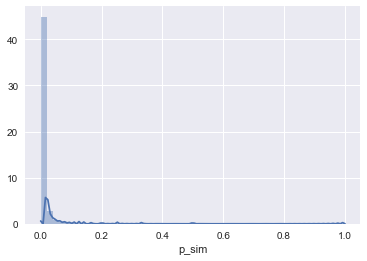

In [3]:
sns.distplot(train_df['p_sim'])

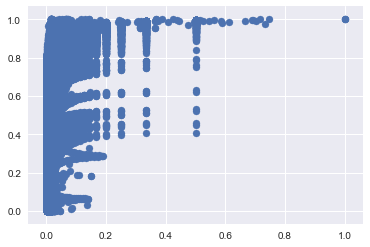

In [4]:
plt.scatter(train_df['p_sim'], train_df['sim'])
plt.show()

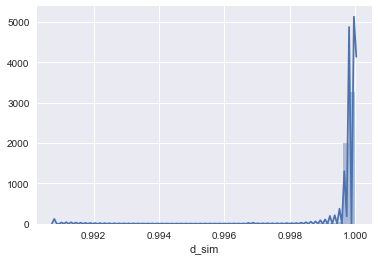

In [5]:
sns.distplot(train_df['d_sim'])

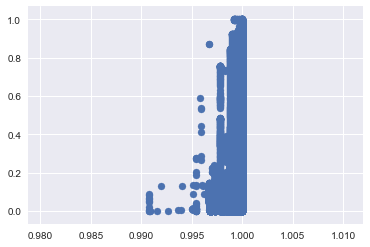

In [6]:
plt.scatter(train_df['d_sim'], train_df['sim'])
plt.show()

In [1]:
plt.scatter(train_df['u_sim'], train_df['sim'])
plt.show()

NameError: name 'plt' is not defined

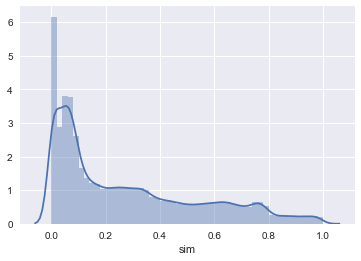

In [7]:
sns.distplot(train_df['sim'])

In [8]:
print("Skewness: %f" % train_df['sim'].skew())
print("Kurtosis: %f" % train_df['sim'].kurt())

Skewness: 0.874686
Kurtosis: -0.367377


In [9]:
train_df['d_sim/p_sim'] = train_df['d_sim']/train_df['p_sim']
train_df.head()

,p_sim,d_sim,u_sim,sim,d_sim/p_sim
0,0.009680,0.998260,0.978388,0.733415,103.126146
1,0.009595,0.998260,0.978021,0.732734,104.042904
2,0.018285,0.996739,0.992097,0.869442,54.510705
3,0.018421,0.996739,0.992187,0.868600,54.108380
4,0.007358,0.995801,0.961459,0.589807,135.341207


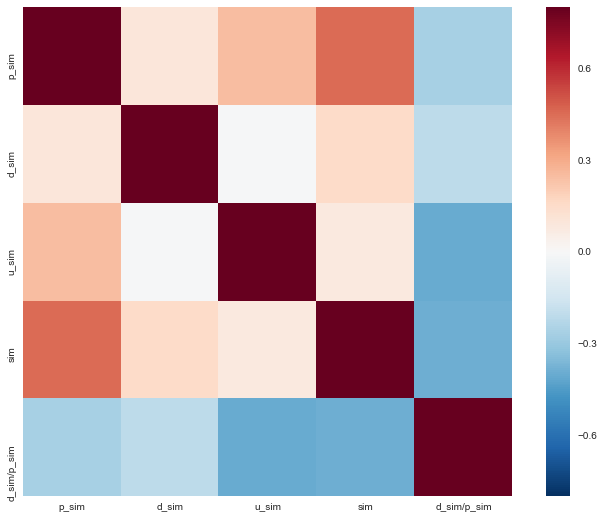

In [10]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

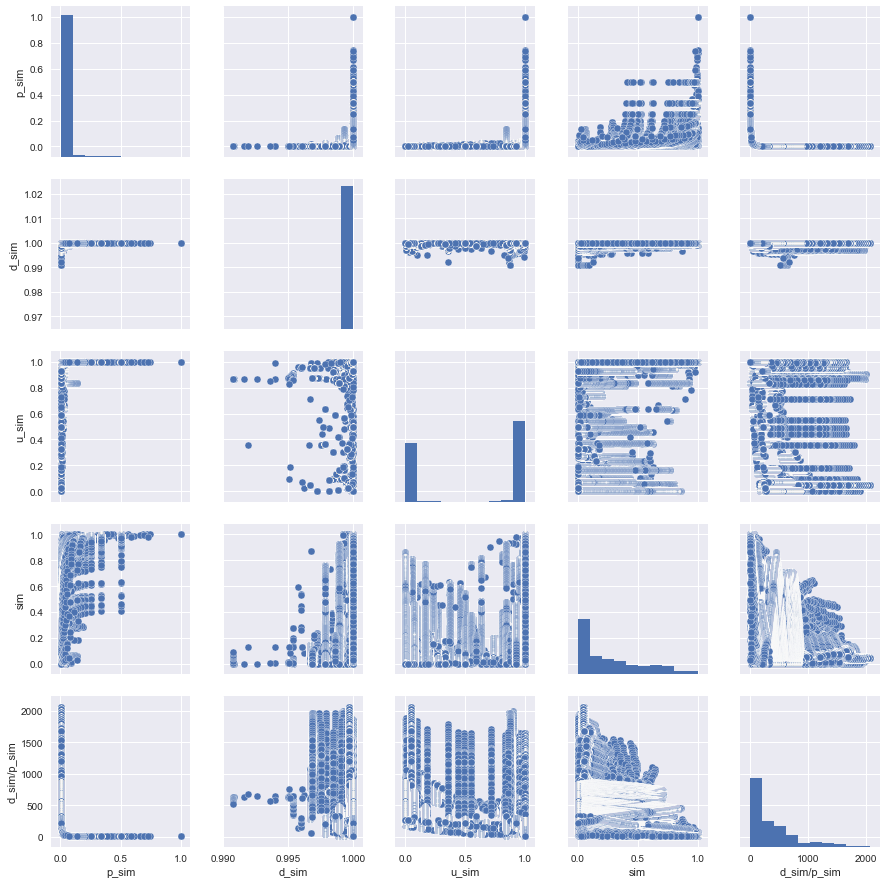

In [11]:
sns.set()
cols = ['p_sim', 'd_sim', 'u_sim','sim', 'd_sim/p_sim']
sns.pairplot(train_df[cols], size = 2.5)
plt.show();

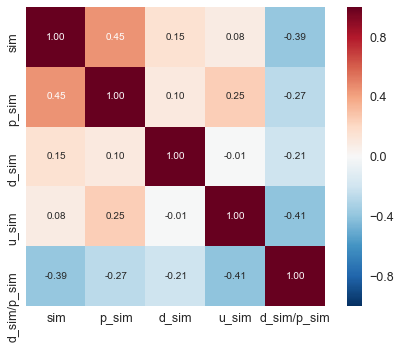

In [12]:
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'sim')['sim'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
yticklabels=cols.values, xticklabels=cols.values)
plt.show()